# Color Scheme Analysis of Popular Illustrations

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from os import listdir
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import random

### Load Dataset

In [40]:
# import images and preprocess
# (dataset can be found at https://www.kaggle.com/profnote/pixiv-popular-illustrations)
path = "C:/Users/Tawan/Desktop/CPS Folder/Color Analysis/Input Image/" # path to local dir
file_names = listdir(path)
new_size = (246, 246)

imgs = []
processed = 0
for name in file_names:
    img = Image.open(path + name)
    img = img.convert("RGB")
    img = np.array(img.resize(new_size))
    imgs.append(img)
    processed += 1
    if processed % 500 == 0:
        print("processed", processed, "images")
    
imgs = np.array(imgs)

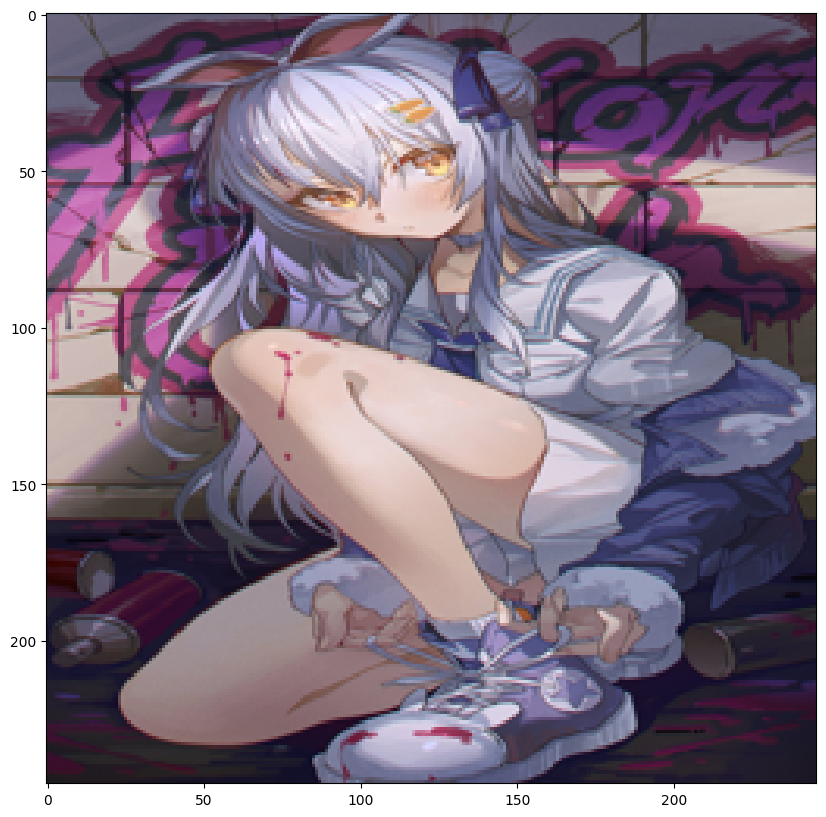

In [41]:
# visualize some images
plt.figure(figsize=(10,10))
# for i in range(9) :
#     plt.subplot(3,3,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     try:
#       plt.imshow(imgs[i])
#     except:
#       pass

plt.imshow(imgs[random.randint(0,len(imgs)-1)])

### Trends in Saturation and Brightness (Value)

In [42]:
# transform images from rgb into hsv
hsv_imgs = []
processed = 0
for img in imgs:
    hsv_img = rgb_to_hsv(img/255) #HSV values range = [0,1]
    hsv_imgs.append(hsv_img)
    processed += 1
    if processed % 500 == 0:
        print("processed", processed, "images")

In [43]:
# Get average saturation and Value of each image
hsv_imgs = np.array(hsv_imgs)
saturation = np.mean(hsv_imgs[:,:,:,1], axis=(1,2))
Value = np.mean(hsv_imgs[:,:,:,2], axis=(1,2))
chroma = np.mean(hsv_imgs[:,:,:,1]*hsv_imgs[:,:,:,2], axis=(1,2))

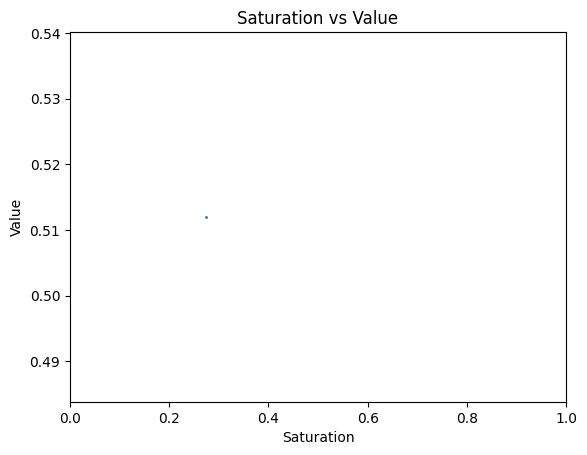

In [44]:
# Plot scatter plot
plt.plot(saturation, Value, marker='o', markersize=1, linewidth=0)
plt.title('Saturation vs Value')
plt.xlabel('Saturation')
plt.ylabel('Value')
plt.xlim(0,1)
plt.show()

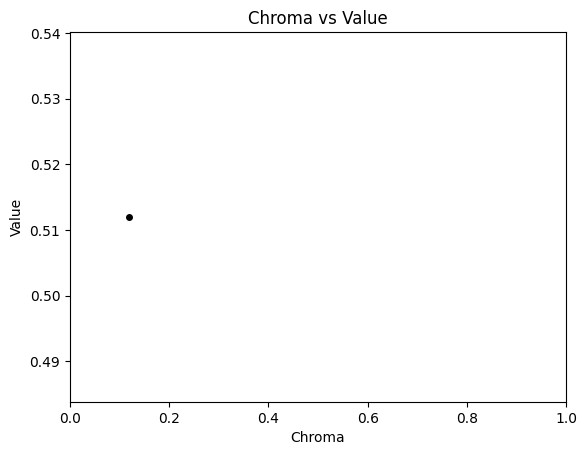

In [45]:
# Plot scatter plot - chroma
eg = random.randint(0,len(imgs)-1) #example illust
plt.plot(chroma, Value, marker='o', markersize=1, linewidth=0)
plt.plot(chroma[eg], Value[eg], marker='o', markersize=4, linewidth=0, color='black')
plt.title('Chroma vs Value')
plt.xlabel('Chroma')
plt.xlim(0,1)
plt.ylabel('Value')
plt.show()

### Color Clustering

#### K-Means clustering

In [46]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

img no. 0
shape: (246, 246, 3)


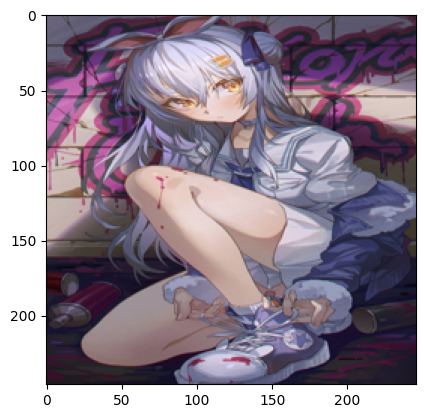

In [47]:
# get image index from file name (for testing)
#samples
# high sat high val e.g.: 46985381
# low sat high val e.g.: 40715238
# low val e.g.: 65822051
# mika pikazo e.g.: 76654781

# id = 0
# for i in range(len(file_names)):
#     if '76654781' in file_names[i]:
#         id = i
id = random.randint(0,len(imgs)-1)


test_img = imgs[id]
print("img no.", id)
print("shape:", test_img.shape)

# view example image
plt.imshow(test_img)
plt.show()

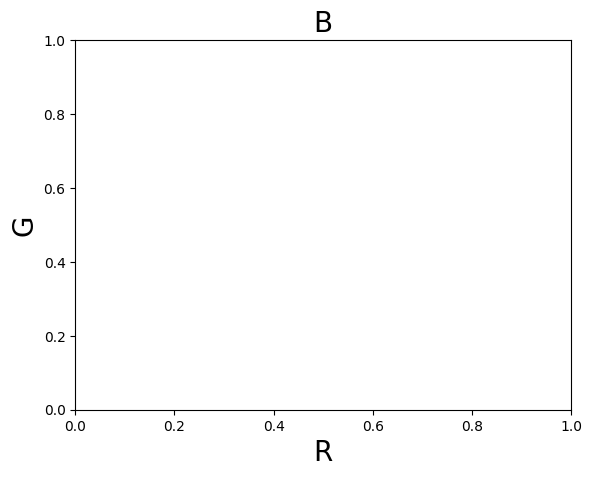

In [48]:
# plot pixels in RGB space 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_img[:,:,0][::10], test_img[:,:,1][::10], test_img[:,:,2][::10]) #plot every 10 pixels to save time
plt.xlabel('R', size=20)
plt.ylabel('G', size=20)
plt.title('B', size=20)
plt.show()

In [49]:
# K-means clustering
# code derived from https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    HEXCOLS = None
    
    def __init__(self, image, clusters=3):
        # image as numpy array (RGB)
        self.CLUSTERS = clusters
        self.IMAGE = image
        
        
    def dominantColors(self):
        img = self.IMAGE
        
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    
    def plotClusters(self):
        self.HEXCOLS = [self.rgb_to_hex(i) for i in self.COLORS]
        
        fig = plt.figure()
        ax = Axes3D(fig)
        ind = 0
        for pix in range(self.IMAGE.shape[0]//10):
            ax.scatter(self.IMAGE[pix*10][0], self.IMAGE[pix*10][1], self.IMAGE[pix*10][2], color = self.HEXCOLS[self.LABELS[pix*10]])
            percent = 0
        plt.title('Color Clusters')
        plt.show()

In [50]:
# Color cluster our test img
clusters = 10
dc = DominantColors(test_img, clusters)
colors = dc.dominantColors()
print(colors)

c:\Users\Tawan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 37  27  45]
 [152 151 178]
 [118 117 146]
 [166 140 139]
 [223 207 213]
 [ 72  52  73]
 [139 103 110]
 [ 92  84 112]
 [200 180 182]
 [188  97 155]]


In [51]:
# View colored scatter plot
# dc.plotClusters()

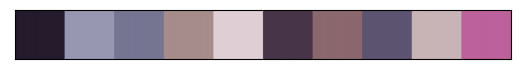

In [52]:
# function to visualize array of colors
def palette(colors):
    # input: array of RGB colors
    num_colors = len(colors)
    pal = np.zeros((100, 100 * num_colors, 3))
    for c in range(len(colors)):
        pal[:,c*100:c*100+100, 0] = colors[c][0]
        pal[:,c*100:c*100+100, 1] = colors[c][1]
        pal[:,c*100:c*100+100, 2] = colors[c][2]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pal/255)
    return 

palette(colors)

### Selecting the main colors
#### Cut off low chroma colors and group the remaining colors to the corresponding colors on the RGB color wheel

In [53]:
# define functions
TOLERANCE = 1.0

def getMainColors(colors_arr, tolerance):
    if len(colors_arr) == 0:
        return
    hsv_colors = rgb_to_hsv(colors_arr/255)
    chroma = hsv_colors[:,1] * hsv_colors[:,2]
    tolerance = tolerance
    cutoff = chroma.mean() - chroma.std() * tolerance
    to_remove = []
    
    for i in range(len(chroma)):
        #print(hsv_colors[i,0]*360) #display hue degrees
        if chroma[i] < cutoff:
            to_remove.append(i)
            
    mainColors = np.delete(colors_arr, to_remove, axis=0)
    return mainColors


def colorsOnWheel(colors_arr):
    # Outputs an array of presence of colors on the RGB color wheel up to tertiary colors (12-split)
    # Red=0,...,Green=4,...,Blue=8
    
    if len(colors_arr) == 0:
        return
    hues = rgb_to_hsv(colors_arr/255)[:,0]
    wheel = [0]*12
    for i in range(len(hues)):
        for c in range(12):
            lb = c*1/12 - 1/24
            ub = c*1/12 + 1/24
            if lb < hues[i] < ub:
                wheel[c] = 1
        if hues[i] > 11/12: 
            # if red > 345 degrees
            wheel[0] = 1
    return wheel

### Your color palette

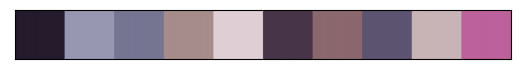

In [54]:
# get main colors of test_img
mainCols = getMainColors(colors, TOLERANCE)
palette(mainCols)

In [55]:
# get the corresponding colors on the RGB wheel
wheel = colorsOnWheel(mainCols)
wheel

[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

### Classifying Algorithms

In [56]:
# get color harmony from mainColors
def getHarmony(wheelColors):
    # Get the corresponding colors on the RGB wheel from array of RGB colors
    w = wheelColors
    harmonies = np.array([monochromatic(w), complementary(w), splitComplementary(w), triad(w), square(w), rectangular(w), analogous(w), False]) * 1
    
    # If other color combinations
    if sum(w) > 1 and sum(harmonies)==0:
        harmonies[-1] = 1
    return harmonies
    
# Harmonies    
def monochromatic(wheelColors):
    return sum(wheelColors)==1


def complementary(wheelColors):
    for curr in range(12):
        opp = (curr+6) % 12
        if wheelColors[curr]==1 and wheelColors[opp]==1:
            return True
    return False


def splitComplementary(wheelColors):
    for curr in range(12):
        opp_left = (curr+5) % 12
        opp_right = (curr+7) % 12
        if wheelColors[curr]==1 and wheelColors[opp_left]==1 and wheelColors[opp_right]==1:
            return True
    return False


def triad(wheelColors):
    for curr in range(12):
        left = (curr+4) % 12
        right = (curr+8) % 12
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1:
            return True
    return False


def square(wheelColors):
    for curr in range(12):
        left = (curr+3) % 12
        right = (curr+9) % 12
        opp = (curr+6) % 12
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and wheelColors[opp]==1:
            return True
    return False


def rectangular(wheelColors):
    for curr in range(6):
        for width in range(1,3):
            left = (curr+width) % 12
            right = (curr+6+width) % 12
            opp = (curr+6) % 12
            if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and wheelColors[opp]==1:
                return True
    return False


def analogous(wheelColors):
    for curr in range(12):
        right = (curr+1) % 12
        if wheelColors[curr]==1 and wheelColors[right]==1:
            return True
    return False

### Your color harmonies

In [57]:
# Display harmonies of test_img
labels = ["Monochromatic", "Complementary", "Split Complementary", "Triad", "Square", "Rectangular", "Analogous", "Other"]
harmony = getHarmony(wheel)
for i in range(len(harmony)):
    if harmony[i]: 
        print(labels[i])

Analogous
